<a href="https://colab.research.google.com/github/AnLiMan/CNN-for-audio-recognition/blob/main/Emergency_vehicle_siren_sounds_v_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd


pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Project Specific Libraries
import os
import librosa
import librosa.display
import glob 
import skimage

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os

!pip install -q pyyaml h5py  # Требуется для сохранения модели в формате HDF5
zip_file = '/content/drive/My Drive/Files for colab/Emergency_Vehicle_Siren_Sounds.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()
print(os.listdir)

Mounted at /content/drive
<built-in function listdir>


There is 0 csv file in the current version of the dataset:


In [6]:
dat1 = "/content/drive/My Drive/Files for colab/EVS/firetruck/sound_398.wav"
dat2 = "/content/drive/My Drive/Files for colab/EVS/ambulance/sound_198.wav"
sampling_rate1 = dat1
sampling_rate2 = dat2
#dat1, sampling_rate1 = librosa.load('/kaggle/input/firetruck/sound_201.wav')
#dat2, sampling_rate2 = librosa.load('/kaggle/input/ambulance/sound_106.wav')

In [13]:
import wave
import numpy

# Read file to get buffer                                                                                               
dat1 = wave.open("/content/drive/My Drive/Files for colab/EVS/firetruck/sound_398.wav")
dat2 = wave.open("/content/drive/My Drive/Files for colab/EVS/ambulance/sound_198.wav")
sampling_rate1 = dat1
sampling_rate2 = dat2

samples1 = dat1.getnframes()
audio1 = dat1.readframes(samples1)
samples2 = dat2.getnframes()
audio2 = dat2.readframes(samples2)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16_1 = numpy.frombuffer(audio1, dtype=numpy.int16)
audio_as_np_float32_1 = audio_as_np_int16_1.astype(numpy.float32)

audio_as_np_int16_2 = numpy.frombuffer(audio2, dtype=numpy.int16)
audio_as_np_float32_2 = audio_as_np_int16_2.astype(numpy.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15
audio_normalised_1 = audio_as_np_float32_1 / max_int16
audio_normalised_2 = audio_as_np_float32_1 / max_int16

[-0.00772095 -0.00772095 -0.01580811 ... -0.03137207 -0.03271484
 -0.03271484]


IndexError: ignored

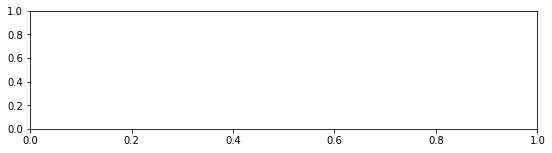

In [14]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(audio_normalised_1, ref=np.max)
#D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Traffic')

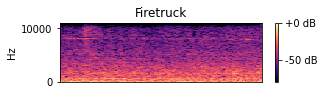

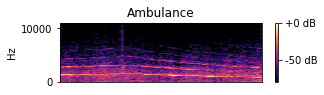

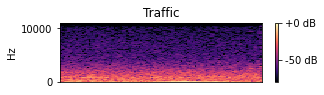

In [15]:
path = "/content/drive/My Drive/Files for colab/EVS/firetruck/sound_398.wav"
path1 = "/content/drive/My Drive/Files for colab/EVS/ambulance/sound_198.wav"
path2 = "/content/drive/My Drive/Files for colab/EVS/traffic/sound_598.wav"
data, sampling_rate = librosa.load(path)
plt.figure(figsize=(10, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Firetruck")
    
data, sampling_rate = librosa.load(path1)
plt.figure(figsize=(10, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Ambulance")
    
data, sampling_rate = librosa.load(path2)
plt.figure(figsize=(10, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Traffic")

In [ ]:
dat1, sampling_rate1 = "/content/drive/My Drive/Files for colab/EVS/ambulance/sound_198.wav"
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

In [ ]:
# 3
feature = []
label = []
folders = ['ambulance', 'firetruck', 'traffic']
ambulance = []
firetruck = []
traffic = []
for folder in folders:
    if folder == 'ambulance':
        ambulance = os.listdir('/kaggle/input/'+folder)    
    elif folder =='firetruck':
        firetruck = os.listdir('/kaggle/input/'+folder)      
    else:
        traffic = os.listdir('/kaggle/input/'+folder)     



FileNotFoundError: ignored

In [ ]:
#4
ambulanceCount = len(ambulance)
fireTruckCount = len(firetruck)
trafficCount =  len(traffic)
feature = []
label = []
#Loads all files in folders and extracts their features
def parser():
    for folder in folders:
        if folder == 'ambulance':
            for i in range(ambulanceCount):
                if ambulance[i] != 'sample.py':
                    X, sample_rate = librosa.load('/kaggle/input/'+folder+'/'+ambulance[i], res_type='kaiser_fast')
                    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
                    feature.append(mels)
                    label.append(1)
        elif folder =='firetruck':
            for i in range(fireTruckCount):
                if firetruck[i] != 'sample.py':
                    X, sample_rate = librosa.load('/kaggle/input/'+folder+'/'+firetruck[i], res_type='kaiser_fast')
                    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
                    feature.append(mels)
                    label.append(1)
        else:
            for i in range(trafficCount):
                if (traffic[i] != 'sample.py') and (traffic[i] != "sound_601.wav"):
                    X, sample_rate = librosa.load('/kaggle/input/'+folder+'/'+traffic[i], res_type='kaiser_fast')
                    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
                    feature.append(mels)
                    label.append(0)
            return [feature, label]
    

In [ ]:
temp = parser()

In [ ]:
temp = np.array(temp)
data = temp.transpose()

In [ ]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([600, 128])

(600,) (600,)


In [ ]:
for i in range(600):
    X[i] = (X_[i])

In [ ]:
Y = to_categorical(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(600, 128)
(600, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [ ]:
'''5'''
X_train = X_train.reshape(450, 16, 8, 1)
X_test = X_test.reshape(150, 16, 8, 1)

In [ ]:
input_dim = (16, 8, 1)

In [ ]:
model = Sequential()

In [ ]:
print(input_dim)

(16, 8, 1)


In [ ]:
'''6'''
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "tanh"))
model.add(Dense(2, activation = "softmax"))

In [ ]:
'''7'''
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


Using TensorFlow backend.


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', f1_m,precision_m, recall_m])

In [ ]:
model.fit(X_train, Y_train, epochs = 90, batch_size = 50, validation_data = (X_test, Y_test))

Train on 450 samples, validate on 150 samples
Epoch 1/90
450/450 [==============================] - 1s 3ms/sample - loss: 0.3773 - accuracy: 0.8422 - f1_m: 0.8422 - precision_m: 0.8422 - recall_m: 0.8422 - val_loss: 0.0817 - val_accuracy: 0.9867 - val_f1_m: 0.9867 - val_precision_m: 0.9867 - val_recall_m: 0.9867
Epoch 2/90
450/450 [==============================] - 0s 534us/sample - loss: 0.0770 - accuracy: 0.9800 - f1_m: 0.9800 - precision_m: 0.9800 - recall_m: 0.9800 - val_loss: 0.1586 - val_accuracy: 0.9867 - val_f1_m: 0.9867 - val_precision_m: 0.9867 - val_recall_m: 0.9867
Epoch 3/90
450/450 [==============================] - 0s 544us/sample - loss: 0.0741 - accuracy: 0.9822 - f1_m: 0.9822 - precision_m: 0.9822 - recall_m: 0.9822 - val_loss: 9.5543e-04 - val_accuracy: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 4/90
450/450 [==============================] - 0s 544us/sample - loss: 0.0258 - accuracy: 0.9978 - f1_m: 0.9978 - precision_m: 0.9978 -

In [ ]:
'''8'''
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

In [ ]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

150/150 [==============================] - 0s 2ms/sample - loss: 1.1093e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000
[1.1092960541342715e-05, 1.0, 1.0, 1.0, 1.0]


In [ ]:
'''9'''
 

'9'

Oh, no! There are no automatic insights available for the file types used in this dataset. As your Kaggle kerneler bot, I'll keep working to fine-tune my hyper-parameters. In the meantime, please feel free to try a different dataset.

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!